In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
unclean = pd.read_csv('train_revised.csv')

## PREPOCESSING THE TRAIN_REVISED TO GENERATE OUR TARGET COLUMN

In [74]:
unclean.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [76]:
ride_id_dict = dict() 
for ride_id in unclean['ride_id']:
    if not ride_id in ride_id_dict:
        ride_id_dict[ride_id] = 1
    else:
        ride_id_dict[ride_id] += 1

In [78]:
unclean.drop_duplicates(inplace=True)
unclean.reset_index(drop= True, inplace=True)

In [79]:
unclean['number_of_ticket']= np.zeros(len(unclean))

In [80]:
for i in range(len(unclean)):
    ride_id = unclean.loc[i]["ride_id"]
    unclean.at[i,'number_of_ticket'] = ride_id_dict[ride_id]

In [81]:
unclean.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1.0
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1.0
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1.0
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5.0
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31.0


In [82]:
unclean.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1.0
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1.0
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1.0
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5.0
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31.0


In [83]:
unclean.to_csv('train_nairobi.csv', index=False)

## WORKING WITH THE CLEANING DATA

In [84]:
train = pd.read_csv('train_nairobi.csv')

In [85]:
train.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1.0
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1.0
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1.0
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5.0
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31.0


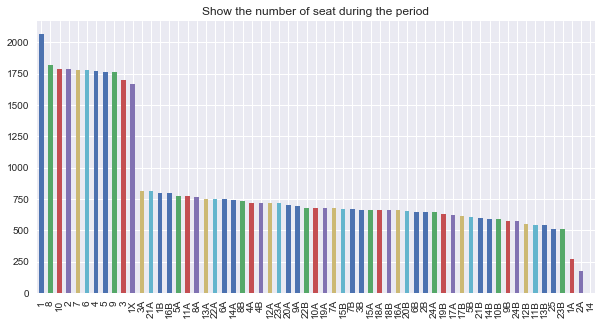

In [86]:
plt.subplots(figsize=(10,5))
train.seat_number.value_counts().plot(kind='bar')
plt.title('Show the number of seat during the period')

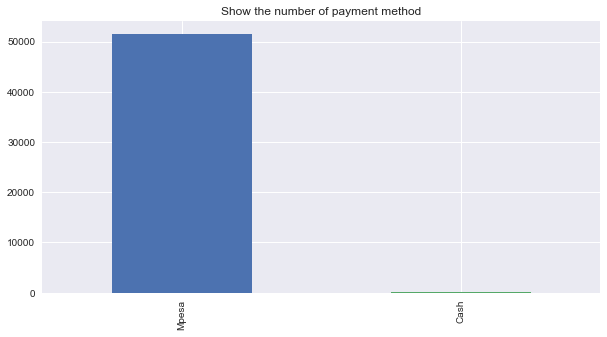

In [87]:
plt.subplots(figsize=(10,5))
train.payment_method.value_counts().plot(kind='bar')
plt.title('Show the number of payment method')

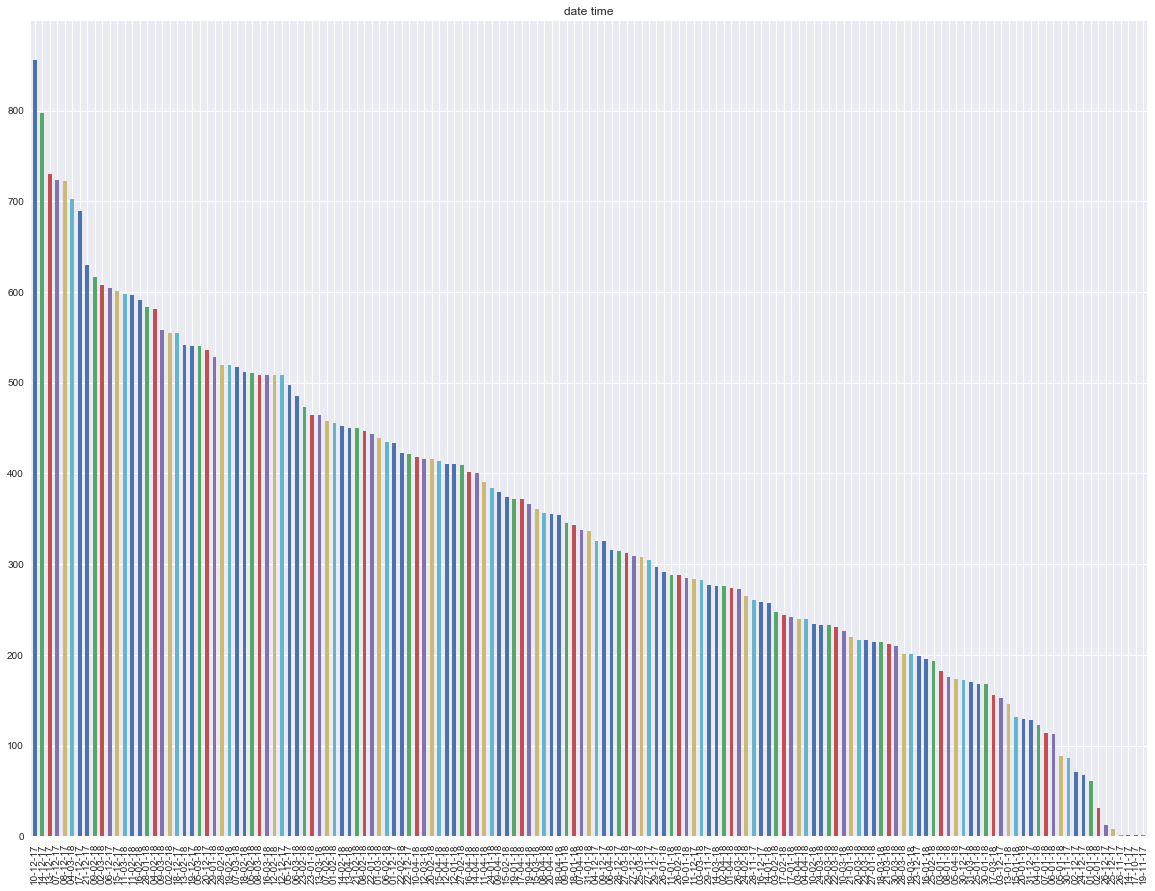

In [88]:
plt.subplots(figsize=(20,15))
train.travel_date.value_counts().plot(kind='bar')
plt.title('date time')

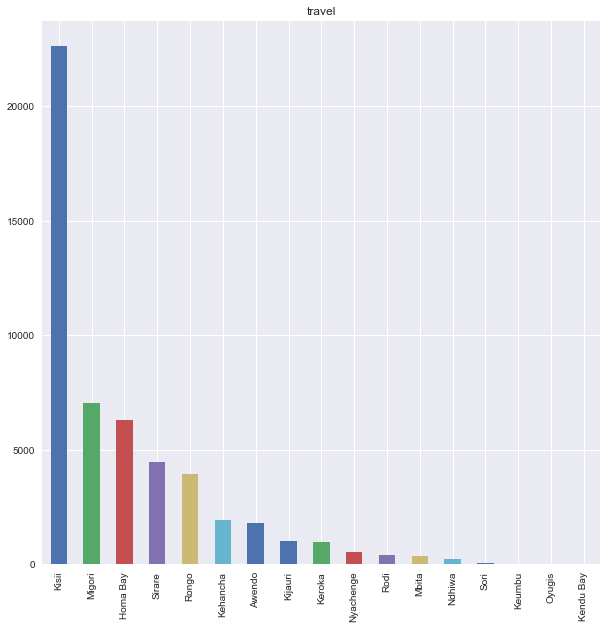

In [89]:
plt.subplots(figsize=(10,10))
train.travel_from.value_counts().plot(kind='bar')
plt.title('travel')

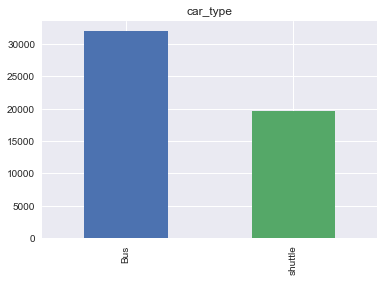

In [90]:
train.car_type.value_counts().plot(kind='bar')
plt.title('car_type')

C:\Users\Raheem Nasiru\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


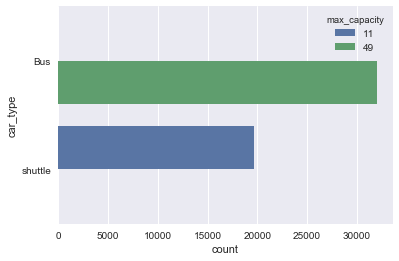

In [91]:
sns.countplot(y=train['car_type'], hue=train['max_capacity'])

## JOINING THE TRAIN AND TEST DATA FOR PREPROCESSING

In [92]:
test = pd.read_csv('test_questions(1).csv')

In [93]:
test.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11


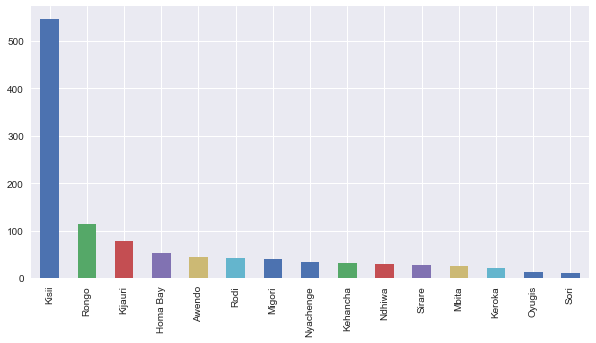

In [94]:
plt.subplots(figsize=(10,5))
test.travel_from.value_counts().plot(kind='bar')

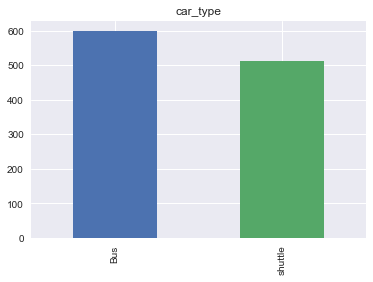

In [95]:
test.car_type.value_counts().plot(kind='bar')
plt.title('car_type')

C:\Users\Raheem Nasiru\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


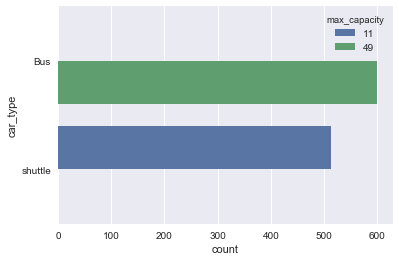

In [96]:
sns.countplot(y=test['car_type'], hue=test['max_capacity'])

In [97]:
train['source']= 'train' #the train
test['source'] = 'test'  #the train

In [98]:
data=pd.concat([train, test],ignore_index=True) #concating them to data

C:\Users\Raheem Nasiru\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [99]:
data.head()

,car_type,max_capacity,number_of_ticket,payment_method,payment_receipt,ride_id,seat_number,source,travel_date,travel_from,travel_time,travel_to
0,Bus,49,1.0,Mpesa,UZUEHCBUSO,1442,15A,train,17-10-17,Migori,7:15,Nairobi
1,Bus,49,1.0,Mpesa,TIHLBUSGTE,5437,14A,train,19-11-17,Migori,7:12,Nairobi
2,Bus,49,1.0,Mpesa,EQX8Q5G19O,5710,8B,train,26-11-17,Keroka,7:05,Nairobi
3,Bus,49,5.0,Mpesa,SGP18CL0ME,5777,19A,train,27-11-17,Homa Bay,7:10,Nairobi
4,Bus,49,31.0,Mpesa,BM97HFRGL9,5778,11A,train,27-11-17,Migori,7:12,Nairobi


In [100]:
#data.info()

In [101]:
print('the shape of the training data',  train.shape)
print('the shape of the test data',  test.shape)
print('the shape of the train&test data',  data.shape)

the shape of the training data (51645, 12)
the shape of the test data (1111, 8)
the shape of the train&test data (52756, 12)


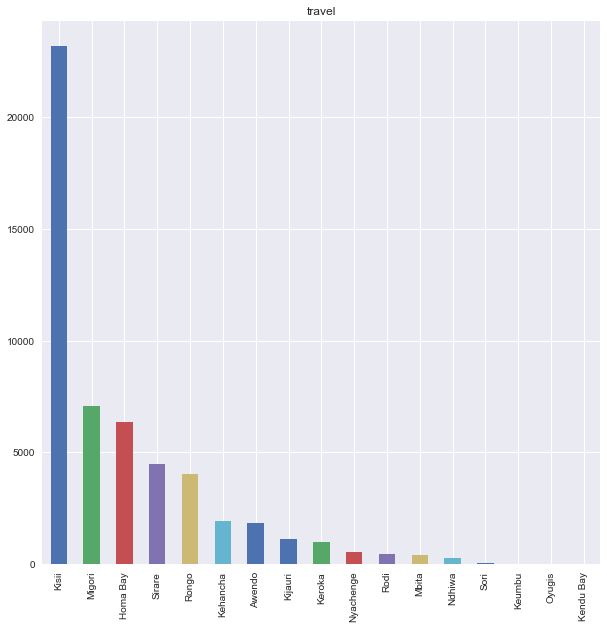

In [102]:
plt.subplots(figsize=(10,10))
data.travel_from.value_counts().plot(kind='bar')
plt.title('travel')

In [103]:
data['travel_from'] = [1 if values == 'Kisii' else 0 for values in data['travel_from']]

In [104]:
data['max_capacity'].value_counts()

49    32584
11    20172
Name: max_capacity, dtype: int64

In [105]:
data['car_type'].value_counts()

Bus        32584
shuttle    20172
Name: car_type, dtype: int64

In [106]:
data.columns

Index(['car_type', 'max_capacity', 'number_of_ticket', 'payment_method',
       'payment_receipt', 'ride_id', 'seat_number', 'source', 'travel_date',
       'travel_from', 'travel_time', 'travel_to'],
      dtype='object')

# extracting features from datetime object

In [107]:
np.min(train['travel_date']), np.min(test['travel_date']), np.min(data['travel_date'])

('01-01-18', '2018-04-21', '01-01-18')

In [108]:
np.max(train['travel_date']), np.max(test['travel_date']), np.max(data['travel_date'])

('31-12-17', '2018-05-09', '31-12-17')

In [109]:
data['travel_date'] = pd.to_datetime(data['travel_date'])

In [110]:
data['day_of_travel_date'] = data['travel_date'].dt.day #day of travel date
data['week_of_travel_date'] = data['travel_date'].dt.week #week of travel date
data['weekday_of_travel_date'] = data['travel_date'].dt.weekday #week of travel date

In [111]:
%%time
def diff(x):
    d = np.diff(x)
    return list(d)
t = data[['ride_id','travel_date']].groupby('ride_id').agg(diff).reset_index()

Wall time: 1.47 s


In [112]:
from tqdm import tqdm

In [113]:
t = data[['ride_id','travel_date']].groupby('ride_id').agg(diff).reset_index()

ids = []
diffs = []
travel_time_id = []
for i in tqdm(range(len(t))):
    time_array = t['travel_date'][i]
    a = [-1] + [x.item() / 1e9 / 60 for x in time_array]
    diffs += a
    ids += [t['ride_id'][i]] * len(a)
    
    sessions = [0]
    if len(a)!=1:
        s = 0
        for j in range(1, len(a)):
            if a[j] > 480: # 480 min == 8hours diff between departure of bus
                s += 1
            sessions.append(s)
    travel_time_id += sessions

100%|████████████████████████████████████████████████████████████████████████████| 7360/7360 [00:03<00:00, 1854.51it/s]


In [114]:
data = data.sort_values(by=['ride_id','travel_date']).reset_index(drop=True)
data['last departure'] = diffs
data['session'] = travel_time_id

In [115]:
data['last departure'] = data[['ride_id','last departure']].groupby('ride_id').agg('max').reset_index()

In [116]:
data.head()

,car_type,max_capacity,number_of_ticket,payment_method,payment_receipt,ride_id,seat_number,source,travel_date,travel_from,travel_time,travel_to,day_of_travel_date,week_of_travel_date,weekday_of_travel_date,last departure,session
0,Bus,49,NaN,NaN,NaN,247,NaN,test,2018-05-07,1,07:06,Nairobi,7,19,0,247.0,0
1,shuttle,11,NaN,NaN,NaN,256,NaN,test,2018-05-06,1,11:08,Nairobi,6,18,6,256.0,0
2,shuttle,11,NaN,NaN,NaN,275,NaN,test,2018-05-04,1,05:00,Nairobi,4,18,4,275.0,0
3,shuttle,11,NaN,NaN,NaN,285,NaN,test,2018-05-04,1,09:10,Nairobi,4,18,4,285.0,0
4,shuttle,11,NaN,NaN,NaN,286,NaN,test,2018-05-04,1,09:20,Nairobi,4,18,4,286.0,0


In [117]:
car = {'Bus':0, 'shuttle':1}

In [118]:
data['car_type'] = data['car_type'].map(car)

In [119]:
data.drop(data[['seat_number', 'travel_to', 'payment_receipt', 'seat_number']], axis=1, inplace=True)

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52756 entries, 0 to 52755
Data columns (total 14 columns):
car_type                  52756 non-null int64
max_capacity              52756 non-null int64
number_of_ticket          51645 non-null float64
payment_method            51645 non-null object
ride_id                   52756 non-null int64
source                    52756 non-null object
travel_date               52756 non-null datetime64[ns]
travel_from               52756 non-null int64
travel_time               52756 non-null object
day_of_travel_date        52756 non-null int64
week_of_travel_date       52756 non-null int64
weekday_of_travel_date    52756 non-null int64
last departure            7360 non-null float64
session                   52756 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(8), object(3)
memory usage: 5.6+ MB


In [121]:
data['payment_method'] = [1 if values == 'Mpesa' else 0 for values in data['payment_method']]

In [122]:
data['year_of_travel_date'] = data['travel_date'].dt.year

In [123]:
data.head()

,car_type,max_capacity,number_of_ticket,payment_method,ride_id,source,travel_date,travel_from,travel_time,day_of_travel_date,week_of_travel_date,weekday_of_travel_date,last departure,session,year_of_travel_date
0,0,49,NaN,0,247,test,2018-05-07,1,07:06,7,19,0,247.0,0,2018
1,1,11,NaN,0,256,test,2018-05-06,1,11:08,6,18,6,256.0,0,2018
2,1,11,NaN,0,275,test,2018-05-04,1,05:00,4,18,4,275.0,0,2018
3,1,11,NaN,0,285,test,2018-05-04,1,09:10,4,18,4,285.0,0,2018
4,1,11,NaN,0,286,test,2018-05-04,1,09:20,4,18,4,286.0,0,2018


In [124]:
data.drop('travel_date', axis=1, inplace=True)

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52756 entries, 0 to 52755
Data columns (total 14 columns):
car_type                  52756 non-null int64
max_capacity              52756 non-null int64
number_of_ticket          51645 non-null float64
payment_method            52756 non-null int64
ride_id                   52756 non-null int64
source                    52756 non-null object
travel_from               52756 non-null int64
travel_time               52756 non-null object
day_of_travel_date        52756 non-null int64
week_of_travel_date       52756 non-null int64
weekday_of_travel_date    52756 non-null int64
last departure            7360 non-null float64
session                   52756 non-null int64
year_of_travel_date       52756 non-null int64
dtypes: float64(2), int64(10), object(2)
memory usage: 5.6+ MB


In [126]:
#express travel time in minutes
data["travel_time"] = data["travel_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [127]:
data.head()

,car_type,max_capacity,number_of_ticket,payment_method,ride_id,source,travel_from,travel_time,day_of_travel_date,week_of_travel_date,weekday_of_travel_date,last departure,session,year_of_travel_date
0,0,49,NaN,0,247,test,1,426,7,19,0,247.0,0,2018
1,1,11,NaN,0,256,test,1,668,6,18,6,256.0,0,2018
2,1,11,NaN,0,275,test,1,300,4,18,4,275.0,0,2018
3,1,11,NaN,0,285,test,1,550,4,18,4,285.0,0,2018
4,1,11,NaN,0,286,test,1,560,4,18,4,286.0,0,2018


In [128]:
data['last departure'] = data['last departure'].fillna(value=data['last departure'].mean())

# time to train model

In [129]:
Train = data.loc[data['source']=='train'] #seperating our training set
Test = data.loc[data['source']=='test']   #seperating test set

In [130]:
Train.drop('source',axis=1,inplace=True)
Test.drop(['source','number_of_ticket'],axis=1,inplace=True)

C:\Users\Raheem Nasiru\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [131]:
Train.to_csv('train_nairo.csv',index=False)
Test.to_csv('test_nairo.csv',index=False)

In [145]:
Train.drop(['ride_id'], axis=1, inplace=True)

C:\Users\Raheem Nasiru\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [132]:
Train.head()

,car_type,max_capacity,number_of_ticket,payment_method,ride_id,travel_from,travel_time,day_of_travel_date,week_of_travel_date,weekday_of_travel_date,last departure,session,year_of_travel_date
109,0,49,1.0,1,1442,0,435,17,42,1,1442.0,0,2017
405,0,49,1.0,1,5437,0,432,19,46,6,5437.0,0,2017
520,0,49,1.0,1,5710,0,425,26,47,6,5710.0,0,2017
545,0,49,5.0,1,5777,0,430,27,48,0,5777.0,0,2017
546,0,49,5.0,1,5777,0,430,27,48,0,5778.0,0,2017


In [133]:
Test.head()

,car_type,max_capacity,payment_method,ride_id,travel_from,travel_time,day_of_travel_date,week_of_travel_date,weekday_of_travel_date,last departure,session,year_of_travel_date
0,0,49,0,247,1,426,7,19,0,247.0,0,2018
1,1,11,0,256,1,668,6,18,6,256.0,0,2018
2,1,11,0,275,1,300,4,18,4,275.0,0,2018
3,1,11,0,285,1,550,4,18,4,285.0,0,2018
4,1,11,0,286,1,560,4,18,4,286.0,0,2018


# importing neccesary algorithm

In [134]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [135]:
lr = LinearRegression()
R = Ridge()
L = Lasso()
gbr = GradientBoostingRegressor()
dtr = DecisionTreeRegressor()

In [136]:
rfr = RandomForestRegressor(n_estimators=100, criterion="mae", n_jobs=-1)

# import metrics

In [137]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

# splitting data to training and validation set

In [146]:
X = Train.drop('number_of_ticket', axis=1)
y = Train['number_of_ticket']

In [147]:
from sklearn.cross_validation import train_test_split, KFold

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [166]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [167]:
pred = dtr.predict(X_test)

In [168]:
mean_absolute_error(y_test, pred)

1.3361046794018152

In [171]:
dtr.score(X, y)

0.91952505253132144

In [169]:
explained_variance_score(y_test, pred)

0.91746954887175036

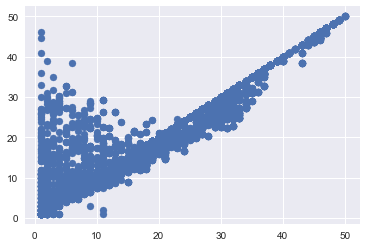

In [170]:
plt.scatter(y_test, pred)

In [ ]:
output1 = pd.DataFrame({'number_of_ticket': pred})
output1.to_csv('na1.csv', index=False)